## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации. 
Нам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Попробуем ответить на вопрос, насколько такие фильмы интересны зрителю.

В исследовании использованы данные, опубликованные на портале  Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

Данные находятся в двух таблицах, которые будут объединены, после проведения предобработки данных будет произведен исследовательский анализ данных и исследованы фильмы, которые получили государственную поддержку.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
# Импортируем библиотеки:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
#Откроем и сохраним датасеты 
films = pd.read_csv('/datasets/mkrf_movies.csv')
shows = pd.read_csv('/datasets/mkrf_shows.csv')

In [3]:
films.sample(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1598,Годзилла.,121008714,2014-04-25T12:00:00.000Z,Художественный,"Уорнер Бразерс, Леджендари Пикчерз, Дисрапшн И...",США - Япония,Гарет Эдвардс,"Джон Джашни, Томас Талл",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,"фантастика,боевик,триллер"
36,Планета КА-ПЭКС /По мотивам романа Джин Бруэр/,221009314,2014-03-03T12:00:00.000Z,Художественный,"Интермедиа Филмз, Юниверсал Пикчерз, Лоуренс Г...",США - Германия,Йэн Софтли,"Лоуренс Гордон, Роберт Коулсберри, Ллойд Левин",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.0,"фантастика,драма,детектив"
3037,Помнить,121006916,2016-03-24T12:00:00.000Z,Художественный,"Серендипити Пойнт Филмз, Эголи Тосселл Филм",Канада - Германия,Атом Эгоян,"Аарон Барнетт, Эри Лантос, Роберт Лантош",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.4,"триллер,драма,детектив"


In [4]:

films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

- **title** — название фильма;
- **puNumber** — номер прокатного удостоверения. Тип данных 'object' нам необходимо поменять на 'int';
- **show_start_date** — дата премьеры фильма;
- **type** — тип фильма;
- **film_studio** — студия-производитель;
- **production_country** — страна-производитель;
- **director** — режиссёр;
- **producer** — продюсер;
- **age_restriction** — возрастная категория;
- **refundable_support** — объём возвратных средств государственной поддержки;
- **nonrefundable_support** — объём невозвратных средств государственной поддержки;
- **financing_source** — источник государственного финансирования;
- **budget** — общий бюджет фильма;
- **ratings** — рейтинг фильма на КиноПоиске;
- **genres** — жанр фильма.

In [5]:
shows.head(5)

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [6]:
shows.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


- **puNumber** — номер прокатного удостоверения;
- **box_office** — сборы в рублях.

- Нам необходимо соединить два датафрема. Объединять будем по столбцу **puNumber**. В датафреме **films** нам необходимо поменять тип данных в этом столбце на числовой.
- Но при попытке изменить тип данных вылезает ошибка. Скорее всего в столбце присутствуют строковые значения. Найдем их

In [7]:
films[~films['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


- Таких записей всего две. В первом случае   присутствуют пробелы, их можно удалить методом **strio**.  А во втором случем мы обратимся к сайту **Министерства культуру к разделу** к разделу **Реестр прокатных удостоверений фильмов**
- На сайте Министерства культуры я нашел две записи об этом фильме . У одного номер есть, а второго нет. Возьмем номер удостоверения с сайта и добавим его в наш ДФ.

In [8]:
#Удалим пробелы
films.loc[804, 'puNumber'] = films.loc[804, 'puNumber'].strip()
#Добавим номер удостоверения
films['puNumber'] = films['puNumber'].replace('нет', '111009614')


In [9]:
films.loc[films['puNumber'] == '111009614']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),111009614,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN
2078,Курбан-роман. (История с жертвой).,111009614,2014-09-02T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Похоже на неявный дубликат. На сайте этих фильмов тоже два. Думаю стоит удалить тот у которго дата регистрации 2014-05-15, т.к на сайте у него номера прокатного удостоверения

In [10]:
#Удалим дубликат и сбросим индексы
films = films.drop(index=[1797]).reset_index(drop=True)


In [11]:
#Изменим ти данных и проверим
films['puNumber'] = films['puNumber'].astype('int')
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7485 entries, 0 to 7484
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [12]:
films.loc[films['puNumber'] =='111009614']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres


**Теперь можно соединять  датафреймы**

In [13]:
#Соединям датафреймы
df = films.merge(shows, on = 'puNumber', how='left')
#Выведем первые 5 строк
df.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Как мы видим все 3158 строк с данными о сборах перенеслись в новый датафрем. Можно приступать к предобрабоке**

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

 - show_start_date необходимо поменять на   datetime
 - ratings — нужно поменять на  float

In [15]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'],format='%Y-%m-%dT%H:%M:%S', utc=True)

In [16]:
#df['ratings'] = df['ratings'].astype('float')

Когда я менял тип данных в столбце **ratings** выяснилось , что в столбце имееются значения с процентами. Скорее всего 100% соответствует значеню 10 и т.д. Необходимо привести весь столбец к нормальным значениям типу данных float. Для этого мы удалим '%', затем поменяем тип данных на float, а потом разделим значения выше 10 на 10

In [17]:

df['ratings'] = df['ratings'].replace('\%', '', regex = True)
df['ratings']= df['ratings'].astype('float64') 
df.loc[df['ratings'] > 10, 'ratings'] = df['ratings']/10


In [18]:
#убедимся, что значения находятся в диапазоне от 0 до 10
df['ratings'].describe()[['min', 'max']]

min   1.00
max   9.90
Name: ratings, dtype: float64

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   puNumber               7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [20]:
# Комментарий ревьюера
temp = df.copy() # создаем копию датасета до преобразования
len(temp)

7485

In [21]:
#Выведем пропущенные  значения
df.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

- **film_studio** у 18 фильмов не указана студия, т.к это не влияет на исследование можно заменить н азначение "неизвестно"
- **production_country** у 2 фильмов не указана страна производства, тут так же моожно заменить на "неизвестно"
- **director** в 9 фильмах не указан режисер заменим пропуски на "неизвестно"
- **producer**  продюсер не указан для 568 фильмах - заменим пропуски на "неизвестно"
- **genres** жанра нет у  976 фильмов,заменим пропуски на "неизвестно"
- **ratings** у 995 фильмов нет рейтинга. Тут так же можно нпопробовать найти его на Кинопоиске, но н аэто так же уйдет много времени. Оставим пропуски
- **box_office** у 4327 нет информации о сборах. Скорее всего это ошибка в выгрузке данных. В теории наверное можно найти информацию на кинопоиске, но заполнять такое количество значений вручную нецелесообразно. Оставим пропуски.
- **- refundable_support, nonrefundable_support, budget, financing_source** у  95% фильмов нет информация о бюджете фильма,источнике государственного финансирования и объёмах возвратных и невозвратных средств гос.поддержки. Скорее всего это сявязано с тем, что не все фильмы получившие прокатное удостоверение получали гос.поддержку


#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [22]:
# Проверим явные дубликаты:
df.duplicated().sum()

0

Проверим дубликаты в столбце **puNumber**:

In [23]:
df['puNumber'].duplicated().sum()

2

In [24]:
df[df.duplicated(subset=['puNumber'], keep = False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.00,"мелодрама,комедия",NaN
4638,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.60,"драма,мелодрама,история",NaN
5066,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.40,"комедия,криминал",NaN
5067,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.80,"комедия,криминал",NaN


Как мы видим это не дубликаты, т.к  у нас отличаются названия фильмов. Номер прокатного удостоверения не уникален, возможно ошибка связана с человечесуим фактором. Считаю, что дублиткат можно оставить , т.к на исследование он не повлияет

In [25]:
#Проверим дубликаты в названиях фльмов

df[df['title'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN
12,Малышка на миллион /По мотивам рассказов Ф.Х.Т...,221011415,2015-04-03 12:00:00+00:00,Художественный,"Уорнер Бразерс, Лейкшор Интертейнмент, Малпасо...",США,Клинт Иствуд,"Клинт Иствуд, Том Розенберг, Альберт С.Рудди, ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,8.10,"драма,спорт",NaN
26,Оружейный барон,221012515,2015-04-03 12:00:00+00:00,Художественный,"Вэ И Пэ Медиенфондс 3, Асендант Пикчерз, Сатур...",США - Франция - Турция,Эндрю Никкол,"Норман Голуайтли, Энди Грош, Николас Кейдж, Эн...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.70,"боевик,драма,криминал",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7368,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.50,"триллер,детектив,криминал",NaN
7415,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"комедия,приключения,детектив",NaN
7437,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.50,"триллер,драма","175,003.51"
7449,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"триллер,криминал,детектив",NaN


Дубликаты в названиях это нормкльно, т.к один фильм могли показывать в кино разное время  и каждый раз выдавалось новое удостоверение. 

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [26]:
# Удалим из столбца type лишние пробелы, которые встречаются в начале и в конце строки:
df['type']=df['type'].str.strip()

# Удалим  из столбца production_country лишние пробелы
df['production_country']=df['production_country'].replace(' ','', regex=True)

# Заменим еще в столбце production_country дефис на запятую в целях единообразия разделителей:
df['production_country']=df['production_country'].replace('-',',', regex=True)

В категориальных переменных встречаются  списки -  режиссеров, студий, жанров и стран. Считаю, что решением данной проблемы будет выделение первых значений из строк

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?



In [27]:
# Опишем количественные значения:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
puNumber,"7,485.00","135,196,587.56","38,352,919.34","1,811,096.00","112,025,118.00","121,015,510.00","124,003,314.00","231,001,111.00"
refundable_support,332.00,"11,864,457.83","24,916,555.26",0.00,0.00,0.00,"15,000,000.00","180,000,000.00"
nonrefundable_support,332.00,"48,980,988.89","59,980,117.92",0.00,"25,000,000.00","30,000,000.00","40,375,000.00","400,000,000.00"
budget,332.00,"127,229,716.68","188,588,333.12",0.00,"42,000,000.00","68,649,916.00","141,985,319.50","2,305,074,303.00"
ratings,"6,519.00",6.49,1.11,1.00,5.90,6.60,7.20,9.90
box_office,"3,158.00","76,478,696.16","240,353,122.82",0.00,"86,239.00","2,327,987.55","23,979,671.02","3,073,568,690.79"


In [28]:
#Посчитаем количество фильмов, в которых есть гос.поддержка, но при этом бюджет составляет ноль
df[(df['nonrefundable_support'] != 0)&(df['budget']==0)]['title'].count()


16

удалим эти строки и еще раз посчитаем

In [29]:
df = df[(df['nonrefundable_support'] != 0)&(df['budget']!=0)]
df[(df['nonrefundable_support'] != 0)&(df['budget']==0)]['title'].count()

0

In [30]:
# Посчитаем количество фильмов, в которых кассовые сборы составляет менее 1000 руб:
df[df['box_office'] < 1000]['title'].count()

231

**Количественные значения содержатся в следующих столбцах:**

- **budget** Есть фильмы  в которых нет бюджета, всего таких фильмов 16. Нам негде взять эти данные, удалим эти строки
- **refundable_support** Даже если гос.поддержка была получена это не значит , что будет возврат средств
- **nonrefundable_support** Получение гос.поддержки всегда означает наличие какого-то объёма невозвратных средств. Поэтому выглядят подозрительными 9 фильмов с гос.поддержкой, у которых объём невозвратных средств составляет 0 руб. Скорее всего, забыли указать сумму nonrefundable_support. Эти фильмы были удалены вместе с 16 записями с нулевым бюджетом.
- **ratings** не у всех фильмов указан бюджет
- **box_office** Эти значения есть только у половины фильмов. У 231го фильма сумма сборов меньше 1000 рублей - это выглядит подозрительно. Возможно значения должны быть в млн или тысячах

In [31]:
# Комментарий ревьюера
# Проверим сколько удалено строк датасета
a, b = len(temp), len(df)
print(a, b, round((a-b)/a*100, 2))

7485 7460 0.33


#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [32]:
#Выделим год премьеры из даты
df['year']=pd.DatetimeIndex(df['show_start_date']).year

df.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [33]:
df['main_director'] = df['director'].str.split(",").str[0]
df['main_genre'] = df['genres'].str.split(",").str[0]
df['main_director'] = df['main_director'].str.strip()
df['main_genre'] = df['main_genre'].str.strip()
df.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [34]:
# Добавим в таблицу столбец total_support, в котором сумируем объем возвратных и невозвратных средств гос.поддержки:
df['total_support'] = df['refundable_support'] + df['nonrefundable_support']

# Добавим столбец с расчетом доли каждого вида гос.поддержки от общего бюджета фильма: 
df['%_total_support']=df['total_support']/df['budget']
df['%_refundable_support']=df['refundable_support']/df['budget']
df['%_nonrefundable_support']=df['nonrefundable_support']/df['budget']
df.head(5)
# Создадим столбец с главной страной:
df_country=df['production_country'].str.split(',',expand=True)
df['country_first']=df_country[0]

In [35]:
# Исключим пока из анализа фильмы, по которым не были заполненные данные по бюджету фильма, а также по объему невозвратных средств гос.поддержки:
list=['budget', 'total_support', 'refundable_support', 'nonrefundable_support', '%_total_support', '%_refundable_support', '%_nonrefundable_support']
df[list].describe().T

,count,mean,std,min,25%,50%,75%,max
budget,307.00,"133,337,107.24","192,921,923.81","14,462,464.00","45,510,944.00","70,876,172.00","148,225,750.00","2,305,074,303.00"
total_support,307.00,"59,771,071.16","73,872,664.01","3,000,000.00","25,100,000.00","35,000,000.00","60,000,000.00","500,000,000.00"
refundable_support,307.00,"10,410,423.45","23,856,986.78",0.00,0.00,0.00,"10,000,000.00","180,000,000.00"
nonrefundable_support,307.00,"49,360,647.71","60,150,060.16","3,000,000.00","25,000,000.00","30,000,000.00","40,000,000.00","400,000,000.00"
%_total_support,307.00,0.52,0.17,0.04,0.38,0.59,0.66,0.78
%_refundable_support,307.00,0.06,0.10,0.00,0.00,0.00,0.09,0.60
%_nonrefundable_support,307.00,0.46,0.18,0.02,0.32,0.48,0.65,0.70


Медианный бюджет фильма с гос.подержкой составляет 70.8 млн руб, а средний 133 млн руб.Это гооворит нам о том, что есть фильмы снятые с высоким бюджетом, это мы видим из макс значения в 230млн рублей.

**Мы провели предобработку данных. Проверили датасет нап дубликаты, добавили новые столбцы необходимые для дальнейшего исследования и удалили строки в которых есть гос.поддержка, но при этом бюджет составляет ноль**

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

In [36]:
# Посчитаем сколько фильмов выходило в прокат каждый год:
movie = df.groupby('year')['box_office'].count()
movie = movie.to_frame().reset_index()
movie.rename(columns={'box_office':'movies_in_theatres'}, inplace=True)
movie

,year,movies_in_theatres
0,2010,105
1,2011,109
2,2012,128
3,2013,184
4,2014,278
5,2015,456
6,2016,523
7,2017,353
8,2018,470
9,2019,527


In [37]:

films = df.groupby('year')['title'].count()
films = films.to_frame().reset_index()
films.rename(columns={'title':'films_total'}, inplace=True)
films['movies_in_theatres'] = movie['movies_in_theatres']
films['films_in_theatres_ratio, %']=(films['movies_in_theatres']/films['films_total'])*100

display(films)

print('Cреднее количество фильмов в год: %.0f' % films['films_total'].mean())
print('Cреднее количество фильмов в кинотеатрах в год: %.0f' % movie['movies_in_theatres'].mean())
print('Доля фильмов с указанной информацией о прокате в кинотеатрах: %.2f' % films['films_in_theatres_ratio, %'].mean(), '%')

,year,films_total,movies_in_theatres,"films_in_theatres_ratio, %"
0,2010,985,105,10.66
1,2011,622,109,17.52
2,2012,593,128,21.59
3,2013,630,184,29.21
4,2014,805,278,34.53
5,2015,696,456,65.52
6,2016,815,523,64.17
7,2017,501,353,70.46
8,2018,886,470,53.05
9,2019,927,527,56.85


Cреднее количество фильмов в год: 746
Cреднее количество фильмов в кинотеатрах в год: 313
Доля фильмов с указанной информацией о прокате в кинотеатрах: 42.36 %


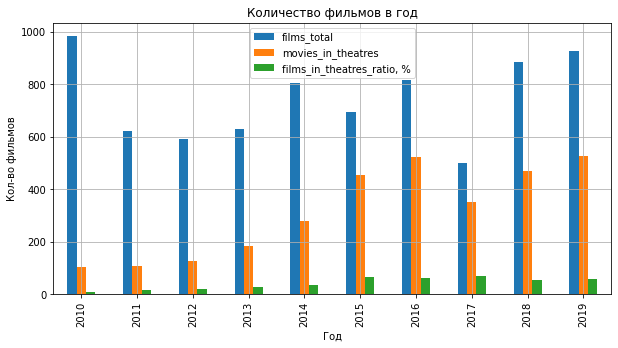

In [38]:
# Построим барчарт по количеству фильмов получивших прокатные удостоверения и о прокате в кинотеатрах
films.plot(x='year',  kind='bar', figsize = (10, 5), grid = True, title='Количество фильмов в год')
plt.xlabel('Год')
plt.ylabel('Кол-во фильмов')
plt.show()

In [39]:
films.corr()

,year,films_total,movies_in_theatres,"films_in_theatres_ratio, %"
year,1.00,0.15,0.91,0.87
films_total,0.15,1.00,0.30,-0.08
movies_in_theatres,0.91,0.30,1.00,0.90
"films_in_theatres_ratio, %",0.87,-0.08,0.90,1.00


In [40]:
films.describe().T

,count,mean,std,min,25%,50%,75%,max
year,10.00,"2,014.50",3.03,"2,010.00","2,012.25","2,014.50","2,016.75","2,019.00"
films_total,10.00,746.00,160.72,501.00,624.00,750.50,868.25,985.00
movies_in_theatres,10.00,313.30,174.34,105.00,142.00,315.50,466.50,527.00
"films_in_theatres_ratio, %",10.00,42.36,22.14,10.66,23.49,43.79,62.34,70.46


- Количество фильмов показынных в кино сильно меньше общего количества выданных прокатныхьудостоверений, это означает, что они получали разркгение например на показ в онлайн кинотеатрах. В среднем удостоверенияполучали 746 фильмов каждый, из них выходило в кинотеатрах в 2,4 раза меньше - 313 фильмов.

- Количество фильмов, получающих прокатные удостоверения не сильно меняется за исследуемый период времени. В 2017 году было выдано меньше всего прокатных удостоверений.А вот число фильмов предназначенных для показа в кинотеатрах растет практически каждый год. Коэффициент корреляции **0.91** говорит о том, что год выхода имеет прямую положительную зависимость от количества фильмов в кинотеатрах.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [41]:
# Посмотрим на величину проката за каждый год:
box_office_result = df.groupby('year')['box_office'].sum()

box_office_result

year
2010        2,428,654.00
2011       14,102,765.00
2012        6,955,423.00
2013       29,799,706.20
2014    7,434,717,843.10
2015   38,427,444,491.66
2016   46,742,316,269.48
2017   47,364,913,114.75
2018   48,674,622,551.95
2019   47,723,583,006.14
Name: box_office, dtype: float64

Text(0, 0.5, 'Кассовые сборы, млрд руб')

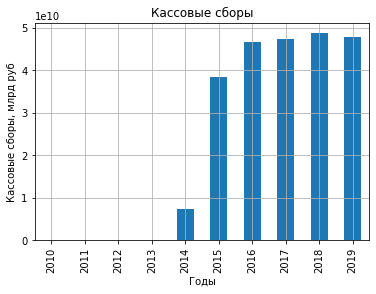

In [42]:
# Посторим  график, отражающий зависимость между величиной кассовых сборов и годом:
box_office_result.plot(kind='bar', grid=True)
plt.title('Кассовые сборы')
plt.xlabel('Годы')
plt.ylabel('Кассовые сборы, млрд руб')

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [43]:

df.groupby('year')['box_office'].agg(['mean','median'])

,mean,median
year,,
2010,"23,130.04","1,700.00"
2011,"129,383.17","3,000.00"
2012,"54,339.24","5,660.00"
2013,"161,954.92","3,522.50"
2014,"26,743,589.36","18,137.50"
2015,"84,270,711.60","4,742,671.67"
2016,"89,373,453.67","3,776,087.56"
2017,"134,178,224.12","9,876,765.00"
2018,"103,563,026.71","8,730,277.53"


Для наглядности построим график с медианой и средним по годам

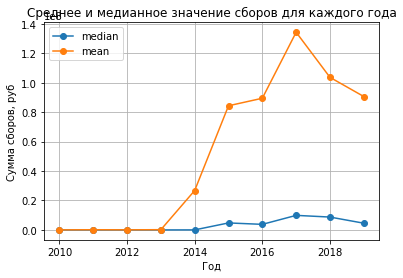

In [44]:

(
    df.groupby('year')['box_office']
    .agg(['median', 'mean'])
    .plot(style='-o', grid=True, figsize=(6, 4))
)
plt.title('Среднее и медианное значение сборов для каждого года')
plt.xlabel('Год')
plt.ylabel('Сумма сборов, руб')
plt.show()

**Медианное значение сильно отличается от среднего. Это говорит о том, что есть  фильмы с очень высокими сборами, которые очень сильно влияют на среднее значение. В 2017 году быи самые высокие сборы, но при этом было выдано меньгъше всего прокатных удостоверений**

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [45]:
box_office_age = df.query('year >= 2015').groupby(['year', 'age_restriction'])['box_office'].agg('sum').reset_index()
box_office_age['box_office'] = box_office_age['box_office']/1000000
box_office_age.rename(columns={'year':'Год'
                               ,'age_restriction': 'Возрастное ограничение'
                               ,'box_office':'Сборы, млн. руб'}, inplace=True)
box_office_age

,Год,Возрастное ограничение,"Сборы, млн. руб"
0,2015,«0+» - для любой зрительской аудитории,379.05
1,2015,«12+» - для детей старше 12 лет,"13,399.86"
2,2015,«16+» - для детей старше 16 лет,"10,770.57"
3,2015,«18+» - запрещено для детей,"5,430.35"
4,2015,«6+» - для детей старше 6 лет,"8,447.62"
5,2016,«0+» - для любой зрительской аудитории,150.23
6,2016,«12+» - для детей старше 12 лет,"11,150.76"
7,2016,«16+» - для детей старше 16 лет,"16,594.25"
8,2016,«18+» - запрещено для детей,"6,793.93"
9,2016,«6+» - для детей старше 6 лет,"12,053.15"


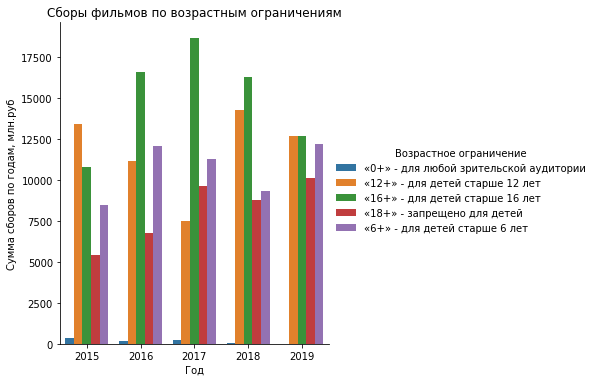

In [46]:
#Построим график зависимости сборов по возрастной категории от года
box_office_age_gr = sns.catplot(x='Год', y='Сборы, млн. руб', hue='Возрастное ограничение', data=box_office_age, kind='bar');
plt.title('Сборы фильмов по возрастным ограничениям');
plt.xlabel('Год');
plt.ylabel('Сумма сборов по годам, млн.руб');


По полученным данным можно сказать, что категория 16+ пользуется наибольшей популярностью, она не балы первой только в 2015 году, когда  лидером стала категория 12+, в 2019 году 6+. Эти  категории собирают кассу выше, чем 0+ и 18+, скорее всего из-за более широкого круга зрителей. 

***Вывод***
- Количество фильмов показынных в кино сильно меньше общего количества выданных прокатных удостоверений.
- Количество фильмов, получающих прокатные удостоверения не сильно меняется за исследуемый период времени.
- Число фильмов предназначенных для показа в кинотеатрах растет практически каждый год. 
- Фильмы категории **16+** собирают самую большую кассу
- в 2017 году были самые большие сборы 

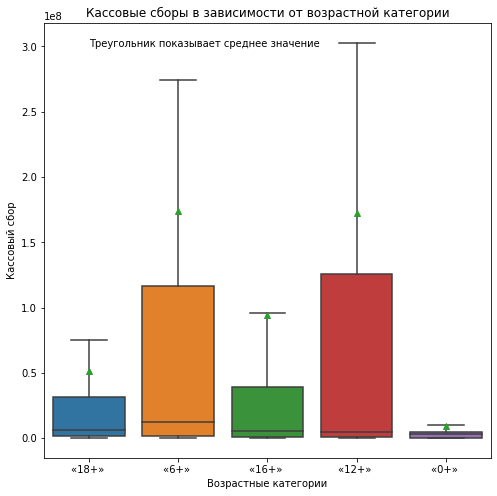

In [47]:
temp = df.copy()
# для удобства укоротим названия категорий
# Функция для выбора первого элемента из перечисления
def get_first_value(s, sep = ','):
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))
# сохраним маску для среза по годам
year_mask = temp['year'] >= 2015

plt.figure(figsize=(8, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории', 
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 3.0e8,'Треугольник показывает среднее значение')
plt.show()

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [48]:
# Создадим таблицу с данными по фильмам с гос.поддержкой:
budget_movies=df.query('nonrefundable_support>=0')
display(budget_movies.head(10))
print('Кол-во прокатных удостоверний у фильмов с гос.поддержкой:', len(budget_movies['puNumber']))
print('Кол-во фильмов с гос.поддержкой:', len(budget_movies['title'].unique()))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,genres,box_office,year,main_director,main_genre,total_support,%_total_support,%_refundable_support,%_nonrefundable_support,country_first
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,"драма,мелодрама","365,353.60",2013,А.Атанесян,драма,"26,500,000.00",0.33,0.00,0.33,Россия
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,NaN,"28,140.00",2014,А.Якимчук,NaN,"26,000,000.00",0.70,0.00,0.70,Россия
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,"комедия,фантастика","19,957,031.50",2013,Р.Давлетьяров,комедия,"107,847,945.00",0.61,0.00,0.61,Россия
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,драма,"55,917.50",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,"28,000,000.00",0.69,0.00,0.69,Россия
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,драма,"232,100.00",2014,М.Угаров,драма,"25,000,000.00",0.62,0.00,0.62,Россия
1853,Тайна Сухаревой башни. Чародей равновесия,114000115,2015-02-18 12:00:00+00:00,Анимационный,"ООО ""Студия ""Мастер-Фильм""",Россия,С.Серегин,А.Герасимов,«6+» - для детей старше 6 лет,0.00,...,"мультфильм,фэнтези,история","15,078,858.60",2015,С.Серегин,мультфильм,"25,000,000.00",0.48,0.00,0.48,Россия
1869,А зори здесь тихие..._,111002915,2015-03-16 12:00:00+00:00,Художественный,"ООО ""Компания ""Реал-Дакота""",Россия,Р.Давлетьяров,NaN,«12+» - для детей старше 12 лет,"50,000,000.00",...,"драма,военный,история","249,166,767.70",2015,Р.Давлетьяров,драма,"150,000,000.00",0.68,0.23,0.45,Россия
1870,Две женщины,111013714,2014-10-02 12:00:00+00:00,Художественный,"ООО ""Продюсерский Центр ""Хорошо Продакшн"", Rez...","Россия,Франция,Латвия",В.Глаголева,Н.Иванова,«12+» - для детей старше 12 лет,0.00,...,драма,"4,731,239.50",2014,В.Глаголева,драма,"46,502,299.00",0.54,0.00,0.54,Россия
1902,Призрак_.,111001815,2015-03-02 12:00:00+00:00,Художественный,"ООО ""Водород 2011""",Россия,А.Войтинский,С.Сельянов,«6+» - для детей старше 6 лет,0.00,...,"триллер,боевик,приключения","352,804,320.40",2015,А.Войтинский,триллер,"75,000,000.00",0.54,0.00,0.54,Россия
1911,Ведьма .,111002215,2015-03-05 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""Ракурс""",Россия,Д.Федоров,В.Сидоренко,«16+» - для детей старше 16 лет,0.00,...,"фэнтези,приключения,драма","51,907.50",2015,Д.Федоров,фэнтези,"34,000,000.00",0.70,0.00,0.70,Россия


Кол-во прокатных удостоверний у фильмов с гос.поддержкой: 307
Кол-во фильмов с гос.поддержкой: 307


In [49]:
#Выясним у каких фильмов нет данных о кассе

budget_movies[budget_movies['box_office'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,genres,box_office,year,main_director,main_genre,total_support,%_total_support,%_refundable_support,%_nonrefundable_support,country_first
2799,Золотая рыбка (2015),111018715,2015-10-29 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Дебют""",Россия,А.Галибин,Б.Токарев,«12+» - для детей старше 12 лет,0.00,...,драма,NaN,2015,А.Галибин,драма,"25,000,000.00",0.60,0.00,0.60,Россия
3336,Любовь и Сакс,111001217,2017-02-16 12:00:00+00:00,Художественный,"ООО ""ДжемСтудия""",Россия,А.Сурикова,А.Голутва,«12+» - для детей старше 12 лет,0.00,...,мелодрама,NaN,2017,А.Сурикова,мелодрама,"10,000,000.00",0.16,0.00,0.16,Россия
3710,Колобанга. Только для пользователей Интернета ...,214010116,2016-10-06 12:00:00+00:00,Анимационный,"ООО ""Колобанга""",Россия,А.Романец,А.Ревва,«0+» - для любой зрительской аудитории,0.00,...,"мультфильм,приключения,детектив",NaN,2016,А.Романец,мультфильм,"11,520,000.00",0.62,0.00,0.62,Россия
5660,"Детский юмористический киножурнал ""ЕРАЛАШ"", вы...",111011917,2017-12-26 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Е.Соколов, В.Панжев, Г.Курлаев, С.Морозов, М.С...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,0.00,...,"детский,комедия",NaN,2017,Е.Соколов,детский,"25,000,000.00",0.56,0.00,0.56,Россия
6475,Зима,111023518,2019-03-15 12:00:00+00:00,Художественный,"ООО ""КиноТрест""",Россия,С.Черников,"З.Болотаев, А.Плотников, Н.Агеев, А.Горский, П...",«16+» - для детей старше 16 лет,0.00,...,"драма,криминал",NaN,2019,С.Черников,драма,"25,000,000.00",0.63,0.00,0.63,Россия
6708,Мальчик русский,111002619,2019-02-20 12:00:00+00:00,Художественный,"АО ""Ленфильм""",Россия,А.Золотухин,NaN,«12+» - для детей старше 12 лет,0.00,...,"драма,военный,история",NaN,2019,А.Золотухин,драма,"30,000,000.00",0.64,0.00,0.64,Россия
6967,Танец с саблями,111008619,2019-05-29 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Флагман"" по заказу ООО ""ММЕ""",Россия,Ю.Разыков,"Р.Дишдишян, ООО ""МАРС МЕДИА ЭНТЕРТЕЙНМЕНТ""",«16+» - для детей старше 16 лет,0.00,...,"драма,история,биография",NaN,2019,Ю.Разыков,драма,"40,000,000.00",0.65,0.00,0.65,Россия
7008,Куратор,111010019,2019-06-13 12:00:00+00:00,Художественный,"ООО ""Кинокомпания Атлантик"", 20 стэпс продакшнс","Россия,Грузия",П.Левченко,Е.Филиппова,«16+» - для детей старше 16 лет,0.00,...,"драма,криминал,детектив",NaN,2019,П.Левченко,драма,"25,000,000.00",0.41,0.00,0.41,Россия
7179,Байкал - Сердце мира 3D,112004619,2019-11-01 12:00:00+00:00,Документальный,"ООО ""Продюсерский центр ""Новое Время""",Россия,А.Попова,"И.Добровольский, А.Разуваева, Ю.Перкуль",«0+» - для любой зрительской аудитории,0.00,...,семейный,NaN,2019,А.Попова,семейный,"3,000,000.00",0.09,0.00,0.09,Россия
7228,На Луне,111015519,2019-11-01 12:00:00+00:00,Художественный,"ООО ""Киностудия ""ВЕРТИКАЛЬ""",Россия,Е.Михалков-Кончаловский,"С.Говорухин, Е.Маскина",«16+» - для детей старше 16 лет,0.00,...,"приключения,триллер",NaN,2019,Е.Михалков-Кончаловский,приключения,"35,000,000.00",0.60,0.00,0.60,Россия


У нас 14 фильмов без данных о сборах. Попробуем найти значения на кинопоиске

**Я нашел данные по сборам только на следующие ильмы. Возьмем средний курс доллара за 68 рублей и посчитаем кассу:**
- **Любовь и Сакс** - данных нет.Удаляем
- **Колобанга** данных нет.Удаляем
- **Детский юмористический киножурнал "ЕРАЛАШ", выпуски 312-323** - данных нет.Удаляем
- **Зима**- сборы 21743  = 1 478 524 руб
- **Мальчик русский (2018)** - сборы 29398  = 1 999 064 руб
- **Танец с саблями (2018)** - сборы 43011  = 2 924 748 руб
- **Куратор (2019)** - сборы 2382 = 161976 руб
- **Байкал - Сердце мира 3D** -сборы 235 737 = 16 030 116 руб
- **На Луне (2019)** - сборы 27190 = 1 848 920 руб
- **Кроличья лапа (2019)** -сборы 14985 = 1 018 980 руб
- **Вторжение (2019)** - сборы 32 649 672 = 2 220 177 696 руб
- **Я свободен (2019)**- данных нет.Удаляем
- **(НЕ)идеальный мужчина (2019**) - сборы 15 767 966  = 1 072 221 688 руб

In [50]:
budget_movies = budget_movies.drop(index=[2799])
budget_movies = budget_movies.drop(index=[3336])
budget_movies = budget_movies.drop(index=[3710])
budget_movies = budget_movies.drop(index=[5660])
budget_movies.loc[6475, 'box_office'] = 1478524
budget_movies.loc[6708, 'box_office'] = 1999064
budget_movies.loc[6967, 'box_office'] = 2924748
budget_movies.loc[7008, 'box_office'] = 161976
budget_movies.loc[7179, 'box_office'] = 16030116
budget_movies.loc[7228, 'box_office'] = 1848920
budget_movies.loc[7343, 'box_office'] = 1018980
budget_movies.loc[7473, 'box_office'] = 2220177696
budget_movies = budget_movies.drop(index=[7475])
budget_movies.loc[7477, 'box_office'] = 1072221688
budget_movies = budget_movies.reset_index(drop=True)
budget_movies[budget_movies['box_office'].isna()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,genres,box_office,year,main_director,main_genre,total_support,%_total_support,%_refundable_support,%_nonrefundable_support,country_first


Создадим два столбца,
total_support - сумма государственной поддержки(возвратная и невозвратная части);
profit - прибыль или убыток от релиза киноленты (касса минус бюджет).

In [51]:
budget_movies['profit'] = budget_movies['box_office'] - budget_movies['budget']
budget_movies

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,box_office,year,main_director,main_genre,total_support,%_total_support,%_refundable_support,%_nonrefundable_support,country_first,profit
0,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,...,"365,353.60",2013,А.Атанесян,драма,"26,500,000.00",0.33,0.00,0.33,Россия,"-79,046,546.40"
1,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,...,"28,140.00",2014,А.Якимчук,NaN,"26,000,000.00",0.70,0.00,0.70,Россия,"-37,114,717.00"
2,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,...,"19,957,031.50",2013,Р.Давлетьяров,комедия,"107,847,945.00",0.61,0.00,0.61,Россия,"-156,066,458.50"
3,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,...,"55,917.50",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,"28,000,000.00",0.69,0.00,0.69,Россия,"-40,518,222.50"
4,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,...,"232,100.00",2014,М.Угаров,драма,"25,000,000.00",0.62,0.00,0.62,Россия,"-39,783,022.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,Фиксики против кработов,114004819,2019-12-21 12:00:00+00:00,Анимационный,"АО ""Аэроплан""",Россия,"В.Бедошвили, О.Ужинов, И.Пшонкин, Д.Цыбулькин","Г.Васильев, С.Саркисов, И.Попов",«6+» - для детей старше 6 лет,"80,000,000.00",...,"387,590,521.72",2019,В.Бедошвили,мультфильм,"120,000,000.00",0.44,0.30,0.15,Россия,"117,590,521.72"
298,Холоп,111021719,2019-12-19 12:00:00+00:00,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,"25,000,000.00",...,"3,073,568,690.79",2019,К.Шипенко,комедия,"60,000,000.00",0.38,0.16,0.22,Россия,"2,913,568,690.79"
299,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.00",...,"717,703,185.53",2019,А.Кравчук,история,"500,000,000.00",0.51,0.10,0.41,Россия,"-262,296,814.47"
300,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00",...,"2,220,177,696.00",2019,Ф.Бондарчук,фантастика,"500,000,000.00",0.53,0.11,0.42,Россия,"1,276,177,696.00"


In [52]:
# Посчитаем, сколько выделяется средств на поддержку кино за весь период:
display(budget_movies['total_support'].describe())
print('Суммарная гос.поддержка за весь период: %.0f' % budget_movies['total_support'].sum())

count           302.00
mean     60,424,499.49
std      74,299,732.56
min       3,000,000.00
25%      25,383,750.00
50%      35,000,000.00
75%      60,000,000.00
max     500,000,000.00
Name: total_support, dtype: float64

Суммарная гос.поддержка за весь период: 18248198847


In [53]:
# посмотрим  как распределилась гос.поддержка по годам:
budget_pivot  = budget_movies.groupby('year')['total_support'].agg(['sum','count', 'median'])


Text(0, 0.5, 'Сумма гос.поддержки, млрд руб')

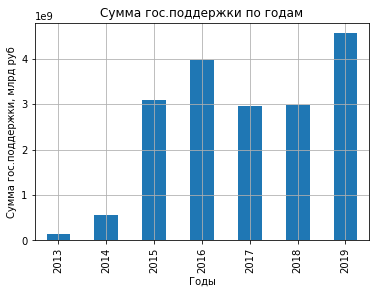

In [54]:
# Посторим  график, отражающий зависимость между величиной гос.поддержки и годом:
budget_pivot['sum'].plot(kind='bar', grid=True)
plt.title('Сумма гос.поддержки по годам')
plt.xlabel('Годы')
plt.ylabel('Сумма гос.поддержки, млрд руб')

Text(0, 0.5, 'Количество фильмов')

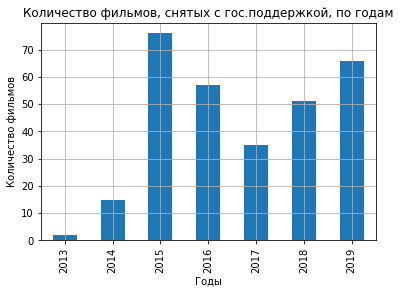

In [55]:
# Посторим  график, отражающий зависимость между количеством фильмов, снятых с гос.поддержкой и годом:
budget_pivot['count'].plot(kind='bar', grid=True)
plt.title('Количество фильмов, снятых с гос.поддержкой, по годам')
plt.xlabel('Годы')
plt.ylabel('Количество фильмов')

year
2013   107,847,945.00
2014    90,000,000.00
2015   250,000,000.00
2016   450,000,000.00
2017   400,000,000.00
2018   260,000,000.00
2019   500,000,000.00
Name: total_support, dtype: float64

Text(0, 0.5, 'Максимальная сумма гос.поддержки, млн руб')

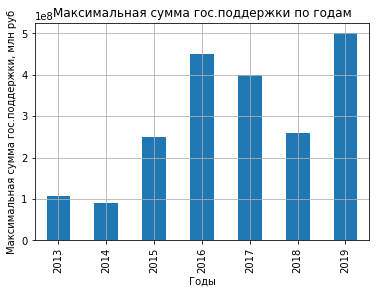

In [56]:
max_support=budget_movies.groupby('year')['total_support'].agg('max')
display(max_support)

max_support.plot(kind='bar', grid=True)
plt.title('Максимальная сумма гос.поддержки по годам')
plt.xlabel('Годы')
plt.ylabel('Максимальная сумма гос.поддержки, млн руб')

In [57]:
# Посчитаем, каков совокупный бюджет фильмов с гос.поддержкой:
print('Суммарный бюджет фильмов с гос.поддержкой за весь период: %.0f' % budget_movies['budget'].sum())
print('Суммарные кассовые сборы фильмов с гос.поддержкой за весь период: %.0f' % budget_movies['box_office'].sum())

Суммарный бюджет фильмов с гос.поддержкой за весь период: 40722032858
Суммарные кассовые сборы фильмов с гос.поддержкой за весь период: 40332532635


In [58]:
# Посмотрим как распределились бюджеты и кассовые сборы по годам:
budget_movies_pivot=budget_movies.groupby('year')['box_office', 'budget'].agg(['sum','count', 'median'])
budget_movies_pivot['result','sum']=budget_movies_pivot['box_office','sum']-budget_movies_pivot['budget','sum']
budget_movies_pivot


box_office                                budget        \
                   sum count        median               sum count   
year                                                                 
2013     20,322,385.10     2 10,161,192.55    255,435,390.00     2   
2014  1,007,188,150.50    15  4,731,239.50  1,279,484,783.00    15   
2015  4,715,364,713.40    76  3,538,064.75  6,731,185,263.00    76   
2016  4,957,724,366.67    57 16,814,329.46  7,210,236,668.00    57   
2017  9,666,281,198.20    35 30,156,174.04  6,529,477,775.00    35   
2018  8,940,288,427.88    51 22,730,244.88  6,466,193,929.00    51   
2019 11,025,363,393.18    66 16,396,869.66 12,250,019,050.00    66   

                               result  
             median               sum  
year                                   
2013 127,717,695.00   -235,113,004.90  
2014  70,876,172.00   -272,296,632.50  
2015  55,567,193.50 -2,015,820,549.60  
2016  69,883,049.00 -2,252,512,301.33  
2017  80,000,000.00  3,136,803,423.20  
2018  93,000,000.00  2,474,094,498.88  
2019  78,388,683.00 -1,224,655,656.82

Text(0, 0.5, 'Результат, млрд руб')

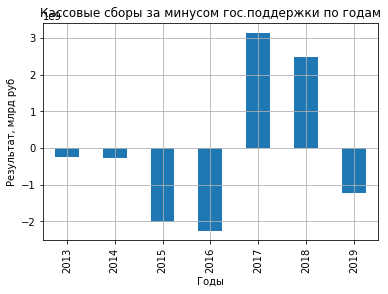

In [59]:
# Посторим  график, отражающий прибыльность фильмов с гос.поддержкой по годам:
budget_movies_pivot['result','sum'].plot(kind='bar', grid=True)
plt.title('Кассовые сборы за минусом гос.поддержки по годам')
plt.xlabel('Годы')
plt.ylabel('Результат, млрд руб')

<AxesSubplot:ylabel='age_restriction'>

count     5.00
mean     60.40
std      46.39
min       6.00
25%      27.00
50%      55.00
75%      98.00
max     116.00
Name: age_restriction, dtype: float64

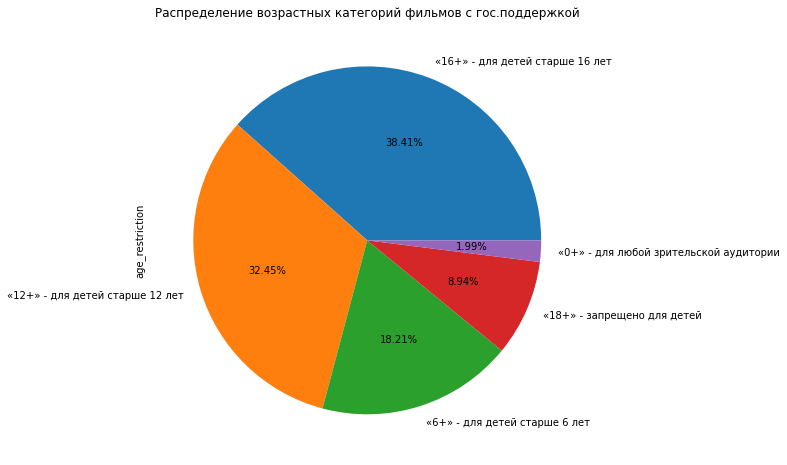

In [60]:
# Посмотрим, для каких возрастных категорий снимают фильмы с гос.поддержкой:
display(budget_movies['age_restriction'].value_counts().plot.pie(y='count', figsize=(8, 8),autopct='%1.2f%%'))
plt.title('Распределение возрастных категорий фильмов с гос.поддержкой')

budget_movies['age_restriction'].value_counts().describe()

<AxesSubplot:ylabel='age_restriction'>

count       5.00
mean    1,114.80
std       720.57
min       432.00
25%       515.00
50%     1,023.00
75%     1,416.00
max     2,188.00
Name: age_restriction, dtype: float64

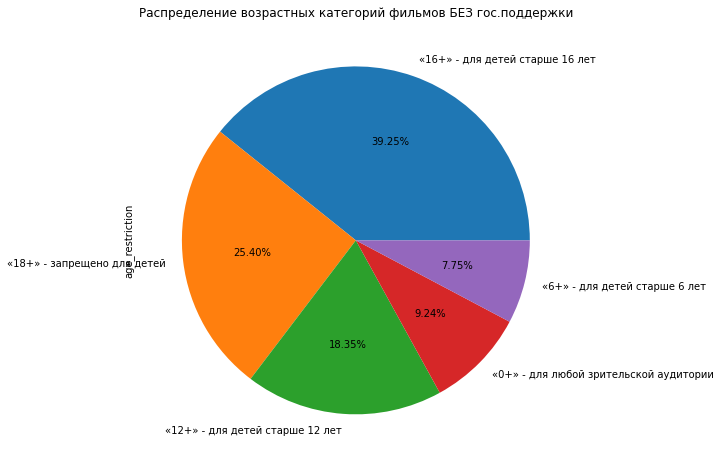

In [61]:
#Выведем для каких возрастных категорий снимают фильмы без гос.поддержки:
nebudget_movies=df.query('country_first!="Россия"')
display(nebudget_movies['age_restriction'].value_counts().plot.pie(y='count', figsize=(8, 8),autopct='%1.2f%%'))
plt.title('Распределение возрастных категорий фильмов БЕЗ гос.поддержки')

nebudget_movies['age_restriction'].value_counts().describe()

Как мы видим из графиков распределение филмов по категориям с гос.поддержкой и без примерно одинаковое

In [62]:
#Выведем имена главных режиссеров рейтинг фильм ов которых выше 8 и их жанры:
budget_movies.query('ratings>7').groupby(['main_director', 'type'])['ratings'].count().sort_values(ascending=False).head(10)

main_director                      type          
Р.Давлетьяров                      Художественный    2
С.Мокрицкий                        Художественный    2
Р.Артемьев (псев.С.Васильев)       Художественный    1
М.Демченко                         Художественный    1
М.Михайлова                        Художественный    1
М.Морсков                          Художественный    1
Н.Бондарчук                        Художественный    1
Н.Лебедев                          Художественный    1
Н.Степанова при участии С.Иванова  Художественный    1
П.Руминов                          Художественный    1
Name: ratings, dtype: int64

In [63]:
(
    budget_movies
    .pivot_table(index= 'main_genre', values = ['total_support'])
    .sort_values(by='total_support',ascending=False)
    .head(10)
)


,total_support
main_genre,
история,"255,000,000.00"
спорт,"151,666,666.67"
фантастика,"115,600,000.00"
приключения,"99,428,571.43"
детектив,"97,000,000.00"
фэнтези,"93,900,000.00"
криминал,"93,333,333.33"
мультфильм,"76,904,761.90"
мюзикл,"60,113,279.75"


Больше всего гос.поддержки получили фильмы в историческом, спортивном, фантастическом жанрах. Режиссеры С.Мокрицкий и Р.Давльетьяров получили еще  и высокие ркйтинги

In [64]:
corr_param = [
    'year',
    'refundable_support',
    'nonrefundable_support',
    'budget',
    'ratings',
    'box_office',
    'total_support',
    'profit']
# Список с названиями параметров на русском
corr_labels = [
    'год',
    'объём возвратных средств;',
    'объём невозвратных средств',
    'общий бюджет фильма',
    'рейтинг',
    'сборы в рублях',
    'общая сумма гос.поддержки',
    'прибыль']

In [65]:
corr_matrix  = budget_movies[corr_param].corr()
corr_matrix

,year,refundable_support,nonrefundable_support,budget,ratings,box_office,total_support,profit
year,1.00,0.07,0.12,0.17,0.01,0.13,0.12,0.05
refundable_support,0.07,1.00,0.44,0.70,0.01,0.37,0.68,-0.02
nonrefundable_support,0.12,0.44,1.00,0.64,0.13,0.52,0.96,0.19
budget,0.17,0.70,0.64,1.00,0.09,0.42,0.75,-0.13
ratings,0.01,0.01,0.13,0.09,1.00,0.12,0.11,0.07
box_office,0.13,0.37,0.52,0.42,0.12,1.00,0.54,0.85
total_support,0.12,0.68,0.96,0.75,0.11,0.54,1.00,0.15
profit,0.05,-0.02,0.19,-0.13,0.07,0.85,0.15,1.00


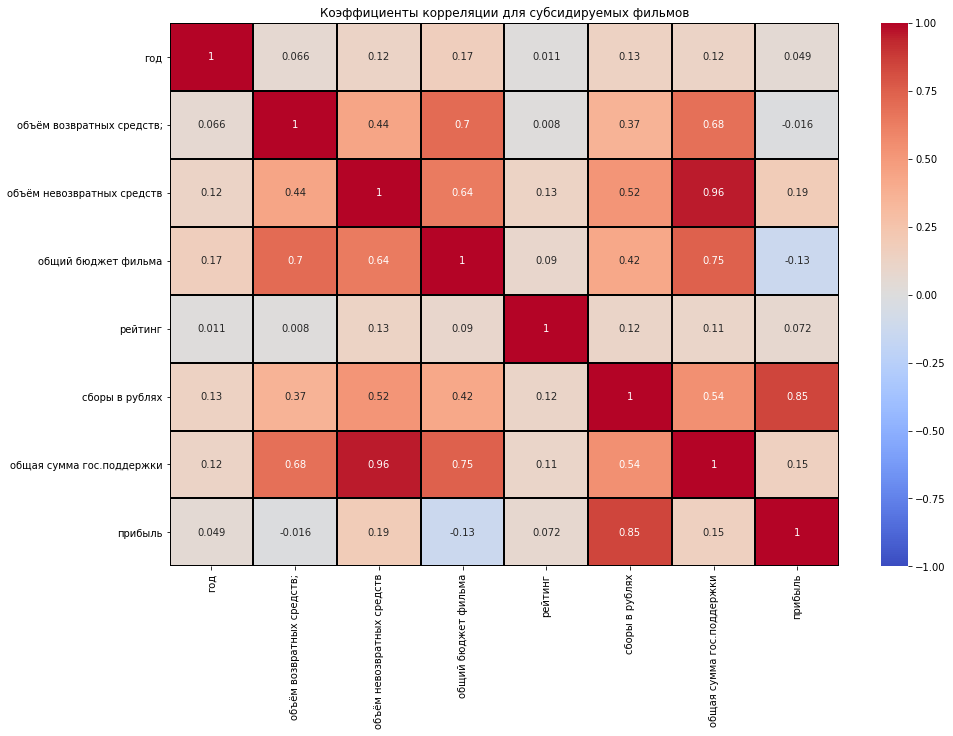

In [66]:
plt.figure(figsize = (15, 10))
sns.heatmap(
    corr_matrix, annot = True, vmin=-1, vmax=1,
    center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black',
    yticklabels=corr_labels,
    xticklabels=corr_labels
).set_title('Коэффициенты корреляции для субсидируемых фильмов');


Прослеживается тесная связь между общим размером субсидий c бюджетом фильма и невозвратными субсидиями. Касса и невозвратные субсидии  корреляция 0.52

In [67]:
#Посмотрим кто из режисеров получил больше субсидий
(
    budget_movies
    .pivot_table(index= 'main_director', values = ['total_support'])
    .sort_values(by='total_support',ascending=False)
    .head(10)
)


,total_support
main_director,
Ф.Бондарчук,"500,000,000.00"
А.Кравчук,"500,000,000.00"
А.Мизгирев,"450,000,000.00"
Н.Лебедев,"442,104,482.00"
А.Мегердичев,"400,000,000.00"
И.Шурховецкий,"350,000,000.00"
Н.Хомерики,"300,000,000.00"
А.Учитель,"300,000,000.00"
О.Степченко,"270,000,000.00"


In [68]:
top_director = (
                budget_movies
                .groupby('main_director')['total_support', 'profit', 'ratings']
                .agg(['count', 'sum', 'mean'])
)
top_director.columns = ['_'.join(col).strip() for col in top_director.columns.values]
top_director.sort_values(by='total_support_sum', ascending=False).head(10)

,total_support_count,total_support_sum,total_support_mean,profit_count,profit_sum,profit_mean,ratings_count,ratings_sum,ratings_mean
main_director,,,,,,,,,
Н.Хомерики,2,"600,000,000.00","300,000,000.00",2,"-490,758,115.80","-245,379,057.90",2,12.30,6.15
Ф.Бондарчук,1,"500,000,000.00","500,000,000.00",1,"1,276,177,696.00","1,276,177,696.00",1,5.70,5.70
А.Кравчук,1,"500,000,000.00","500,000,000.00",1,"-262,296,814.47","-262,296,814.47",1,6.00,6.00
Р.Давлетьяров,5,"459,847,945.00","91,969,589.00",5,"-471,167,304.56","-94,233,460.91",5,33.90,6.78
А.Мизгирев,1,"450,000,000.00","450,000,000.00",1,"-319,915,396.40","-319,915,396.40",1,6.60,6.60
Н.Лебедев,1,"442,104,482.00","442,104,482.00",1,"766,971,523.00","766,971,523.00",1,7.60,7.60
А.Мегердичев,1,"400,000,000.00","400,000,000.00",1,"2,189,493,953.00","2,189,493,953.00",1,7.50,7.50
Д.Дьяченко,4,"351,000,000.00","87,750,000.00",4,"1,624,203,322.12","406,050,830.53",4,22.60,5.65
А.Цицилин,3,"350,000,000.00","116,666,666.67",3,"-321,836,566.75","-107,278,855.58",3,19.00,6.33


In [69]:
top_director.sort_values(by='profit_sum', ascending=False).head(10)

,total_support_count,total_support_sum,total_support_mean,profit_count,profit_sum,profit_mean,ratings_count,ratings_sum,ratings_mean
main_director,,,,,,,,,
К.Шипенко,3,"312,000,000.00","104,000,000.00",3,"3,122,841,549.79","1,040,947,183.26",3,20.50,6.83
А.Мегердичев,1,"400,000,000.00","400,000,000.00",1,"2,189,493,953.00","2,189,493,953.00",1,7.50,7.50
А.Сидоров,1,"180,000,000.00","180,000,000.00",1,"1,707,969,287.52","1,707,969,287.52",1,6.50,6.50
Д.Дьяченко,4,"351,000,000.00","87,750,000.00",4,"1,624,203,322.12","406,050,830.53",4,22.60,5.65
О.Трофим,1,"85,000,000.00","85,000,000.00",1,"1,297,146,575.89","1,297,146,575.89",0,0.00,NaN
Ф.Бондарчук,1,"500,000,000.00","500,000,000.00",1,"1,276,177,696.00","1,276,177,696.00",1,5.70,5.70
М.Бальчюнас (псевдоним М.Вайсберг),1,"100,000,000.00","100,000,000.00",1,"922,074,186.00","922,074,186.00",1,4.50,4.50
Н.Лебедев,1,"442,104,482.00","442,104,482.00",1,"766,971,523.00","766,971,523.00",1,7.60,7.60
Д.Киселев,2,"350,000,000.00","175,000,000.00",2,"696,959,413.00","348,479,706.50",2,13.30,6.65


**ВЫВОД**
- **Бондарчук** получил 500 млн поддержки, которые окупились. Хомерики получил на три фильма 600 млн на два фитльма, но провалился в прокате.
- **Давлетьярову** профинансировали 5 фильмапочти на 460 млн. руб, которые так же не окупились.

- **Шипенко** получил на 3 фильма 312 млн. и собрал хорошую кассу в 3.12 млрд рублей. 
- **Дьяченко** получил на 4 фильма 351 млн рублей поддержки и смог заработать 1.62 млрд рублей
- Больше всего гос.поддержки получили фильмы в историческом, спортивном, фантастическом жанрах. Режиссеры С.Мокрицкий и Р.Давльетьяров получили еще и высокие ркйтинги
- 38.41% от общего количества фильмов с гос.поддержкой составляют фильмы категории **16+**

### Шаг 5. Напишите общий вывод

**Перед нами была поставлена задача изучить российский кинопроката и выявить текущие тренды. Мы получили данные о прокатных удостоверениях, сборах и государственной поддержке фильмов**

Мы провели предобработку данных. Проверили датасет нап дубликаты, добавили новые столбцы необходимые для дальнейшего исследования и удалили строки в которых есть гос.поддержка, но при этом бюджет составляет ноль


***ВЫВОД:***

- Начиная с 2014 года количество выланных удостоверений растет , только в 2017 году было падение
- Больше всекго поддержки получили исторические и спортивные фильмы, что мы собственно и наблюдаем в нашем прокате
- Больбше всего фильмов выходи в прокт в категории **16+** 
- Количество фильмов, снятых с участием государства составляет чуть более 4% от всех фильмов, выпущенных в прокат за все время
- Всего за период была выделена поддержка на сумму 18 248 198 847  руб. 
- Минимальное значение гос.поддержки составило 3 млн руб.
- Общая касса за весь период с гос.поддержкой, составляет 40 332 532 634 руб



Так же хочется отметить тот факт , что фильм с господдержкой скорее всего не окупится в отличии от фильма с частным финансированием . Я думаю это связано с тем , что люди тратят не свои деньги и относятся к ним более халатно.Тут можно провести аналогию с футбольными клубами , частные футбольные клубы более экономически эффективны по сравнению с клубами имеющими гос.финансипрвание